<a href="https://colab.research.google.com/github/Nano1337/E2FGVI/blob/master/E2FGVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Towards An <strong>E</strong>nd-to-<strong>E</strong>nd Framework for <strong>F</strong>low-<strong>G</strong>uided <strong>V</strong>ideo <strong>I</strong>npainting (CVPR 2022)

In this demo, you can try to inpaint an example video through our framework.

# Setup

In [1]:
#@title Setup environment and code (may take some time)

# Install Pytorch
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html 
# Install MMCV
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.5/index.html

# prepare code
import os
CODE_DIR = 'E2FGVI'
os.makedirs(f'./{CODE_DIR}')
!git clone https://github.com/Nano1337/E2FGVI.git $CODE_DIR
os.chdir(f'./{CODE_DIR}')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4 MB 1.1 kB/s 
     |████████████████████████████████| 6.6 MB 58.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0+cu113
    Uninstalling torch-1.12.0+cu113:
      Successfully uninstalled torch-1.12.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.0+cu113
    Uninstalling torchvision-0.13.0+cu113:
      Successfully uninstalled torchvision-0.13.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.5.1+cu101 which is incompatible.
torchaudio 0.12.0+cu113 requires torch==1.12.0, but you have torch 1.5.1+cu101 whic

In [3]:
#@title Download model with PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

download_with_pydrive = True

class Downloader(object):
    def __init__(self, use_pydrive):
        self.use_pydrive = use_pydrive
        current_directory = os.getcwd()
        self.save_dir = os.path.join(os.path.dirname(current_directory), CODE_DIR, "release_model")
        if not os.path.exists(self.save_dir):        
            os.makedirs(self.save_dir)
        if self.use_pydrive:
            self.authenticate()

    def authenticate(self):
        auth.authenticate_user()
        gauth = GoogleAuth()
        gauth.credentials = GoogleCredentials.get_application_default()
        self.drive = GoogleDrive(gauth)

    def download_file(self, file_id, file_name):
        file_dst = f'{self.save_dir}/{file_name}'
        if os.path.exists(file_dst):
            print(f'{file_name} already exists!')
            return
        downloaded = self.drive.CreateFile({'id':file_id})
        downloaded.FetchMetadata(fetch_all=True)
        downloaded.GetContentFile(file_dst)

downloader = Downloader(download_with_pydrive)
path = {"id": "1tNJMTJ2gmWdIXJoHVi5-H504uImUiJW9", "name": "E2FGVI_CVPR22_models.zip"}
downloader.download_file(file_id=path["id"], file_name=path["name"])

os.chdir(downloader.save_dir)
!unzip E2FGVI_CVPR22_models.zip
os.chdir('..')

Archive:  E2FGVI_CVPR22_models.zip
  inflating: E2FGVI-CVPR22.pth       
  inflating: i3d_rgb_imagenet.pt     


In [4]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [5]:
import shutil 
shutil.copy('/content/gdrive/MyDrive/data/E2FGVI-HQ-CVPR22.pth', '/content/E2FGVI/release_model')

'/content/E2FGVI/release_model/E2FGVI-HQ-CVPR22.pth'

# Unzip images and masks from gdrive storage

In [6]:
!unzip /content/gdrive/MyDrive/data/esophagusFrames.zip -d content

Archive:  /content/gdrive/MyDrive/data/esophagusFrames.zip
   creating: content/content/esophagusFrames/
  inflating: content/content/esophagusFrames/00964.png  
  inflating: content/content/esophagusFrames/00246.png  
  inflating: content/content/esophagusFrames/00223.png  
  inflating: content/content/esophagusFrames/01175.png  
  inflating: content/content/esophagusFrames/00488.png  
  inflating: content/content/esophagusFrames/00734.png  
  inflating: content/content/esophagusFrames/01133.png  
  inflating: content/content/esophagusFrames/00678.png  
  inflating: content/content/esophagusFrames/00687.png  
  inflating: content/content/esophagusFrames/01256.png  
  inflating: content/content/esophagusFrames/00887.png  
  inflating: content/content/esophagusFrames/00863.png  
  inflating: content/content/esophagusFrames/01054.png  
  inflating: content/content/esophagusFrames/00538.png  
  inflating: content/content/esophagusFrames/01267.png  
  inflating: content/content/esophagusFr

In [7]:
!unzip /content/gdrive/MyDrive/data/esophagusFrameMasks.zip -d content

Archive:  /content/gdrive/MyDrive/data/esophagusFrameMasks.zip
   creating: content/content/content/CVC-enhanced/mask/
  inflating: content/content/content/CVC-enhanced/mask/00964.png  
  inflating: content/content/content/CVC-enhanced/mask/00246.png  
  inflating: content/content/content/CVC-enhanced/mask/00223.png  
  inflating: content/content/content/CVC-enhanced/mask/01175.png  
  inflating: content/content/content/CVC-enhanced/mask/00488.png  
  inflating: content/content/content/CVC-enhanced/mask/00734.png  
  inflating: content/content/content/CVC-enhanced/mask/01133.png  
  inflating: content/content/content/CVC-enhanced/mask/00678.png  
  inflating: content/content/content/CVC-enhanced/mask/00687.png  
  inflating: content/content/content/CVC-enhanced/mask/01256.png  
  inflating: content/content/content/CVC-enhanced/mask/00887.png  
  inflating: content/content/content/CVC-enhanced/mask/00863.png  
  inflating: content/content/content/CVC-enhanced/mask/01054.png  
  inflatin

In [8]:
import shutil
shutil.rmtree(r'/content/E2FGVI/examples/schoolgirls_mask')
shutil.rmtree(r'/content/E2FGVI/examples/tennis')
shutil.rmtree(r'/content/E2FGVI/examples/tennis_mask')
os.remove(r'/content/E2FGVI/examples/schoolgirls.mp4')

# Be sure to move img/mask folder to examples

# Select image subset that you want to process
Note: that single GPU even on Colab Pro+ can't handle 3000+ images at full resolution...but maybe an 8 core TPU can?

In [ ]:
# identify files to remove from both images and masks folder
starting_img_num = 0
num_frames = 1200

input_path = "/content/E2FGVI/examples/esophagusFrames/"
for i in range(starting_img_num):
  os.remove(input_path + str(i).zfill(5) + ".png")
for i in range(starting_img_num+num_frames, 1278):
  os.remove(input_path + str(i).zfill(5) + ".png")

input_path = "/content/E2FGVI/examples/mask/"
for i in range(starting_img_num):
  os.remove(input_path + str(i).zfill(5) + ".png")
for i in range(starting_img_num+num_frames, 1947):
  os.remove(input_path + str(i).zfill(5) + ".png")

FileNotFoundError: ignored

In [ ]:
arr = os.listdir('/content/E2FGVI/examples/esophagusFrames')
arr.sort()
print(arr[-1])

01199.png


# Split into subfolders to process

In [9]:
%%bash
cd /content/E2FGVI/examples/esophagusFrames/;
c=1; d=1; mkdir -p dir_${d}

for file in *
do
        if [ $c -eq 200 ]
        then
                d=$(( d + 1 )); c=0; mkdir -p dir_${d}
        fi
        mv "$file" dir_${d}/
        c=$(( c + 1 ))
done

In [10]:
%%bash
cd /content/E2FGVI/examples/mask/;
c=1; d=1; mkdir -p dir_${d}

for file in *
do
        if [ $c -eq 200 ]
        then
                d=$(( d + 1 )); c=0; mkdir -p dir_${d}
        fi
        mv "$file" dir_${d}/
        c=$(( c + 1 ))
done

Then move dir_1 out of dir_7 into same parent folder

# Define Utility Functions


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation

import cv2
from PIL import Image
import numpy as np
import importlib
import os
import argparse
from tqdm import tqdm
import torch

# rc('animation', html='jshtml')

from core.utils import to_tensors


# global variables
w, h = 432, 240
ref_length = 10  # ref_step
num_ref = -1
neighbor_stride = 5


# sample reference frames from the whole video 
def get_ref_index(f, neighbor_ids, length):
    ref_index = []
    if num_ref == -1:
        for i in range(0, length, ref_length):
            if i not in neighbor_ids:
                ref_index.append(i)
    else:
        start_idx = max(0, f - ref_length * (num_ref//2))
        end_idx = min(length, f + ref_length * (num_ref//2))
        for i in range(start_idx, end_idx+1, ref_length):
            if i not in neighbor_ids:
                if len(ref_index) > num_ref:
                    break
                ref_index.append(i)
    return ref_index


# read frame-wise masks
def read_mask(mpath):
    masks = []
    mnames = os.listdir(mpath)
    mnames.sort()
    for mp in mnames:
        m = Image.open(os.path.join(mpath, mp))
        m = m.resize((w, h), Image.NEAREST)
        m = np.array(m.convert('L'))
        m = np.array(m > 0).astype(np.uint8)
        m = cv2.dilate(m, cv2.getStructuringElement(
            cv2.MORPH_CROSS, (3, 3)), iterations=4)
        masks.append(Image.fromarray(m*255))
    return masks


#  read frames from video
def read_frame_from_videos(video_path):
    vname = video_path
    frames = []
    lst = os.listdir(vname)
    lst.sort()
    fr_lst = [vname+'/'+name for name in lst]
    for fr in fr_lst:
        image = cv2.imread(fr)
        image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        frames.append(image)
    return frames

# Inpainting 


NOTE: Use CMD line script after this one to run it

In [ ]:
# # set up models
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# net = importlib.import_module('model.e2fgvi')
# model = net.InpaintGenerator().to(device)
# ckpt_path = 'release_model/E2FGVI-CVPR22.pth'
# data = torch.load(ckpt_path, map_location=device)
# model.load_state_dict(data)
# print(f'Loading model from: {ckpt_path}')
# model.eval()

# # prepare dataset
# video_path = 'examples/stomachRunThrough'
# mask_path = 'examples/mask'
# print(f'Loading videos and masks from: {video_path}')
# frames = read_frame_from_videos(video_path)
# video_length = len(frames)
# imgs = to_tensors()(frames).unsqueeze(0) * 2 - 1
# frames = [np.array(f).astype(np.uint8) for f in frames]

# masks = read_mask(mask_path)
# binary_masks = [np.expand_dims((np.array(m) != 0).astype(np.uint8), 2)
#                 for m in masks]
# masks = to_tensors()(masks).unsqueeze(0)
# imgs, masks = imgs.to(device), masks.to(device)
# comp_frames = [None] * video_length

# # completing holes by e2fgvi
# print(f'Start test...')
# for f in tqdm(range(0, video_length, neighbor_stride)):
#     neighbor_ids = [i for i in range(max(0, f-neighbor_stride), min(video_length, f+neighbor_stride+1))]
#     ref_ids = get_ref_index(f, neighbor_ids, video_length)
#     selected_imgs = imgs[:1, neighbor_ids+ref_ids, :, :, :]
#     selected_masks = masks[:1, neighbor_ids+ref_ids, :, :, :]
#     with torch.no_grad():
#         masked_imgs = selected_imgs*(1-selected_masks)
#         pred_img, _ = model(masked_imgs, len(neighbor_ids))

#         pred_img = (pred_img + 1) / 2
#         pred_img = pred_img.cpu().permute(0, 2, 3, 1).numpy() * 255
#         for i in range(len(neighbor_ids)):
#             idx = neighbor_ids[i]
#             img = np.array(pred_img[i]).astype(
#                 np.uint8)*binary_masks[idx] + frames[idx] * (1-binary_masks[idx])
#             if comp_frames[idx] is None:
#                 comp_frames[idx] = img
#             else:
#                 comp_frames[idx] = comp_frames[idx].astype(
#                     np.float32)*0.5 + img.astype(np.float32)*0.5

load pretrained SPyNet...
load checkpoint from http path: https://download.openmmlab.com/mmediting/restorers/basicvsr/spynet_20210409-c6c1bd09.pth
Loading model from: release_model/E2FGVI-CVPR22.pth
Loading videos and masks from: examples/stomachRunThrough
Start test...


100%|██████████| 15/15 [00:06<00:00,  2.15it/s]


In [ ]:
# Calculate scaled down resolution in case GPU runs into RAM OOM error
scale_factor = 0.37
print("Width is " + str(1280*scale_factor))
print("Length is " + str(968*scale_factor))
print("Resolution is " + str(round(scale_factor**2*100, 3)) + "% of the original resolution")

Width is 473.6
Length is 358.15999999999997
Resolution is 13.69% of the original resolution


In [ ]:
for i in range(7, 8):
  result = os.system("python test.py --model e2fgvi_hq --video /content/E2FGVI/examples/esophagusFrames/dir_" + str(i) +
            " --mask /content/E2FGVI/examples/mask/dir_" + str(i) + " --ckpt release_model/E2FGVI-HQ-CVPR22.pth " + 
            "--set_size --width 400 --height 400 --savepath /content/E2FGVI/examples/esophagusFrames/dir_" + str(i))
print(result)

256


In [23]:
!python test.py --model e2fgvi_hq --video /content/E2FGVI/examples/esophagusFrames/dir_2 --mask /content/E2FGVI/examples/mask/dir_2 --ckpt /content/E2FGVI/release_model/E2FGVI-HQ-CVPR22.pth --set_size --width 400 --height 400 --savepath /content/E2FGVI/examples/esophagusFrames/dir_2

load pretrained SPyNet...
load checkpoint from http path: https://download.openmmlab.com/mmediting/restorers/basicvsr/spynet_20210409-c6c1bd09.pth
Loading model from: /content/E2FGVI/release_model/E2FGVI-HQ-CVPR22.pth
Loading videos and masks from: /content/E2FGVI/examples/esophagusFrames/dir_2 | INPUT MP4 format: False
Before loading images: (0, 0)
After loading images and before using model: (1794, 1802)
Start test...
  0% 0/40 [00:00<?, ?it/s]model usage right before: (95714, 96190)
mode usage right after: (139258, 143874)
  2% 1/40 [00:01<00:41,  1.08s/it]model usage right before: (51020286, 52940014)
mode usage right after: (3023238, 52940014)
  5% 2/40 [00:02<00:51,  1.36s/it]model usage right before: (69744078, 71664014)
mode usage right after: (14065366, 71664014)
  8% 3/40 [00:04<00:54,  1.47s/it]model usage right before: (81266134, 83186142)
mode usage right after: (23667422, 83186142)
 10% 4/40 [00:05<00:51,  1.43s/it]model usage right before: (88948190, 90868198)
mode usage

## Show the inpainting video

In [ ]:
import shutil
shutil.rmtree('/content/E2FGVI/results/trimmedRunThrough_results')

In [ ]:
%%bash 
cd results
mkdir trimmedRunThrough_results

In [ ]:
%%bash 
mkdir esophagusFramesRestored

In [ ]:
import cv2

def video_to_frames(video_path):
    # output_path = '/content/E2FGVI/results/stomachRunThroughFrames/'
    # output_path = '/content/E2FGVI/results/trimmedRunThrough_results/'
    output_path = '/content/E2FGVI/esophagusFramesRestored/'
    count = 0
    vname = video_path
    vidcap = cv2.VideoCapture(vname) # initialize video object
    success, image = vidcap.read() # read first frame of video
    while success:
        cv2.imwrite(output_path + str(count).zfill(5) + ".png", image) # writes out first channel to folder
        success, image = vidcap.read()
        count += 1 

video_to_frames(r'/content/E2FGVI/esophagusRestored.mp4')

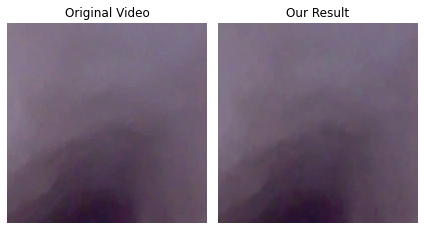

In [ ]:
frames = read_frame_from_videos('/content/E2FGVI/examples/esophagusFrames')
frames = [np.array(f).astype(np.uint8) for f in frames]
comp_frames = read_frame_from_videos('/content/E2FGVI/esophagusFramesRestored')
comp_frames = [np.array(f).astype(np.uint8) for f in comp_frames]

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.axis('off'); ax1.set_title('Original Video')
ax2 = fig.add_subplot(1,2,2)
ax2.axis('off'); ax2.set_title('Our Result')
imdata1 = ax1.imshow(frames[1000])
imdata2 = ax2.imshow(comp_frames[1000].astype(np.uint8))

def update(idx):
    imdata1.set_data(frames[idx])
    imdata2.set_data(comp_frames[idx].astype(np.uint8))

fig.tight_layout()
anim = animation.FuncAnimation(fig, update, frames=len(frames), interval=50)
from IPython.display import HTML
HTML(anim.to_html5_video())

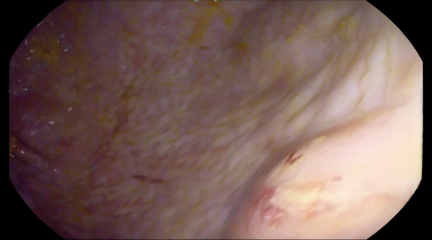

In [ ]:
from google.colab.patches import cv2_imshow

comp_frames[75] = cv2.cvtColor(comp_frames[75], cv2.COLOR_BGR2RGB)
cv2_imshow(comp_frames[75])

# print(comp_frames[5].shape)

Convert Video to Individual Frames

In [ ]:
%%bash
mkdir results

In [ ]:
%%bash 
cd results
mkdir trimmedRunThrough

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

def video_to_frames(video_path):
    # output_path = '/content/E2FGVI/results/stomachRunThroughFrames/'
    output_path = '/content/E2FGVI/results/trimmedRunThrough/'
    count = 0
    vname = video_path
    vidcap = cv2.VideoCapture(vname) # initialize video object
    success, image = vidcap.read() # read first frame of video
    while success:
        cv2.imwrite(output_path + str(count).zfill(5) + ".png", image) # writes out first channel to folder
        success, image = vidcap.read()
        count += 1 
    
    
video_to_frames('/content/trimmedRunThrough.mp4')

In [ ]:
arr = os.listdir('/content/E2FGVI/results/trimmedRunThrough')
print(len(arr))

1947


# Zip and Download 

In [ ]:
!zip -r /content/trimmedRunThrough.zip /content/E2FGVI/results/trimmedRunThrough

# Combine Restored Videos into One




In [ ]:
# Import everything needed to edit video clips
from moviepy.editor import *
 
video_list = []

# loading video
for i in range(1, 7):
  video_list.append(VideoFileClip("/content/E2FGVI/examples/esophagusFrames/dir_" + str(i) + 
                                  "/dir_" + str(i) + "_results.mp4"))
 
# concatenating both the clips
final = concatenate_videoclips(video_list)

#writing the video into a file / saving the combined video
final.write_videofile("esophagusRestored.mp4")
 
# showing final clip
final.ipython_display(width = 400)


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3620864/45929032 bytes (7.9%)7520256/45929032 bytes (16.4%)11427840/45929032 bytes (24.9%)15605760/45929032 bytes (34.0%)19619840/45929032 bytes (42.7%)23625728/45929032 bytes (51.4%)27844608/45929032 bytes (60.6%)32055296/45929032 bytes (69.8%)36323328/45929032 bytes (79.1%)40574976/45929032 bytes (88.3%)44785664/45929032 bytes (97.5%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

100%|██████████| 1199/1199 [00:04<00:00, 241.72it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: esophagusRestored.mp4 



100%|██████████| 1199/1199 [00:02<00:00, 480.19it/s]


# MISC/trash code: 

In [ ]:
import os
import cv2
path = r'/content/content/content/E2FGVI/complete_stomach_frames/'
for i in range(94):
  os.remove(path + str(i).zfill(5) + ".png")

In [ ]:
!zip -r /content/esophagusFrames.zip /content/esophagusFrames

In [ ]:
!zip -r /content/stomachRunThrough.zip /content/E2FGVI/examples/stomachRunThrough

see dimension of input image

In [ ]:
read = cv2.imread("/content/E2FGVI/examples/stomachRunThrough/00000.png")
print(read.shape)

(968, 1280, 3)


Rename files in folder

In [ ]:
path = r'/content/E2FGVI/examples/stomachRunThrough/'
image_names = []
for f in os.listdir(path):
  image_names.append(f)

image_names.sort()

counter = 0
for f in image_names: 
  img_path = path + f
  read = cv2.imread(img_path)
  os.remove(img_path)
  cv2.imwrite(path + str(counter).zfill(5) + ".png", read)
  counter += 1



In [ ]:
read = cv2.imread('/content/esophagusFrames/00000.png')
print(read.shape)

(400, 400, 3)


# Reset image folder

In [ ]:
import shutil
shutil.rmtree("/content/E2FGVI/content")
shutil.rmtree("/content/E2FGVI/examples/mask")
shutil.rmtree("/content/E2FGVI/examples/esophagusFrames")
# shutil.rmtree("/content/E2FGVI/examples/stomachRunThrough")
# shutil.rmtree("/content/E2FGVI/examples/trimmedRunThrough")

# Diagnosing GPU Memory Issues

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

In [ ]:
import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 53.0 GB  |     Proc size: 648.1 MB
GPU RAM Free: 16160MB | Used: 0MB | Util   0% | Total     16160MB


In [ ]:
!nvidia-smi

Wed Jun  1 13:58:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
string = "V000.seq"
print(string[:4])

V000
